# Hypothesis Testing
### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## Has the network latency gone up since we switched internet service providers?
### Null Hypothesis
- The network latency has gone down or remained constant since switching providers

### Alt Hypothesis
- The network latency has gone up since switching

### True positive
- We reject the null hypothesis, the network latency indeed went up

### True negative
- We accept the null hypothesis, the network latency did not go up

### Type I
- The network latency appeared to go up, but did not.

### Type II
- The network latency did not appear to go up, but it did.


## Is the website redesign any good?
### Null Hypothesis
- The website redesign negatively or did not affect customer retention

### Alt Hypothesis
- The website redesign positively impacted customer retention

### True positive
- We reject the null hypothesis, The website redesign indeed improved customer retention

### True negative
- We accept the null hypothesis, The website redesign did not improve customer retention

### Type I
- The website redesign appeared to improve customer retention, but did not.

### Type II
- The website redesign did not appear to improve customer retention, but it did.

## Is our television ad driving more sales?
### Null Hypothesis
- Our ad is not driving or not affecting sales

### Alt Hypothesis
- Our ad is driving more sales

### True positive
- We reject the null hypothesis, our ad indeed drove more sales

### True negative
- We accept the null hypothesis, our ad did not drive more sales

### Type I
- Our ad appeared to drive more sales, but did not.

### Type II
- Our ad did not appear to drive more sales, but did.

# T-Test Exercises

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [1]:
from pydataset import data
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Ace Realty

In [2]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
# Use a .05 level of significance.
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
office1 = stats.norm(90, 15).rvs(40)
office2 = stats.norm(100, 20).rvs(50)

(array([1., 0., 5., 3., 8., 6., 6., 4., 3., 4.]),
 array([ 46.00550167,  53.22241142,  60.43932118,  67.65623093,
         74.87314068,  82.09005044,  89.30696019,  96.52386994,
        103.74077969, 110.95768945, 118.1745992 ]),
 <BarContainer object of 10 artists>)

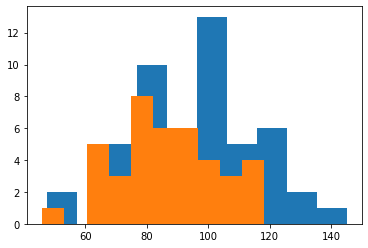

In [3]:
# Plot the distributions.
plt.hist(office2)
plt.hist(office1)

In [4]:
# Null: H_0 = No difference, H_a = Difference
# alpha: .05
# Verify: Independent variables, normal distribution, equal variance...
office1.var(), office2.var()

(270.1372783809899, 370.0838786304203)

In [5]:
# Variance is not equal
# Calculate t and p
t, p = stats.ttest_ind(office1, office2, equal_var=False)
t, p 

(-2.4904380530193517, 0.014646159078142472)

In [6]:
# Decide
p < .025

True

#### We reject the null hypothesis, the difference between Office 1 and Office 2 is statistically significant.

In [7]:
# Safe test
stats.mannwhitneyu(office1, office2)

MannwhitneyuResult(statistic=728.0, pvalue=0.013741986377348445)

## mpg dataset

In [8]:
# Load the mpg dataset
df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

(array([ 5., 12., 24., 17., 16., 20., 16.,  3.,  3.,  1.]),
 array([ 9. , 10.9, 12.8, 14.7, 16.6, 18.5, 20.4, 22.3, 24.2, 26.1, 28. ]),
 <BarContainer object of 10 artists>)

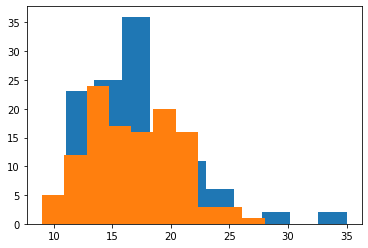

In [9]:
# Plot the distributions
plt.hist(df[df.year == 1999].cty)
plt.hist(df[df.year == 2008].cty)

In [10]:
# Establish hypothesis: H_0 = No, H_a = Yes
# Set alpha: alpha = .05
# Verify assumptions: Normal-ish distribution, Independent variables, equal variance...
df[df.year == 1999].cty.var(), df[df.year == 2008].cty.var()

(19.879015620394938, 16.452844090775127)

In [11]:
# Compute t and p
t, p = stats.ttest_ind(df[df.year == 1999].cty, df[df.year == 2008].cty)
t, p

(0.5674988409997608, 0.5709240495406107)

In [12]:
p < .025

False

#### We accept the null hypothesis, there is no statistical significance between the fuel efficency of cars made in 1999 versus 2008.

In [13]:
# Safe test
stats.mannwhitneyu(df[df.year == 1999].cty, df[df.year == 2008].cty)

MannwhitneyuResult(statistic=6790.5, pvalue=0.45870813783633435)

### Are compact cars more fuel-efficient than the average car?

(array([ 5., 11., 10., 15.,  0.,  2.,  2.,  1.,  0.,  1.]),
 array([15. , 16.8, 18.6, 20.4, 22.2, 24. , 25.8, 27.6, 29.4, 31.2, 33. ]),
 <BarContainer object of 10 artists>)

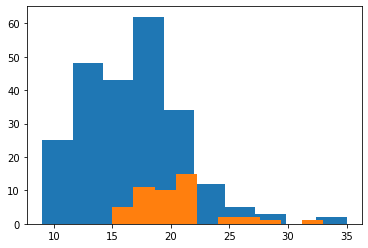

In [14]:
# Plot the distributions
plt.hist(df.cty)
plt.hist(df[df['class'] == 'compact'].cty)

In [15]:
# Establish hypothesis: H_0 = No, H_a = Yes
# Set alpha: alpha = .05
# Verify assumptions: Normal-ish distribution
df[df['class'] == 'compact'].cty.var(), df.cty.var()

(11.46160962072155, 18.1130736216573)

In [16]:
# Compute t and p
t, p = stats.ttest_1samp(df[df['class'] == 'compact'].cty, df.cty.mean())
p

3.4017448216394005e-08

In [17]:
p < 0.05

True

#### We reject the null hypothesis, compact cars have statistically-significant greater fuel efficiency than average fuel efficiency of all cars.

### Do manual cars get better gas mileage than automatic cars?

<AxesSubplot:>

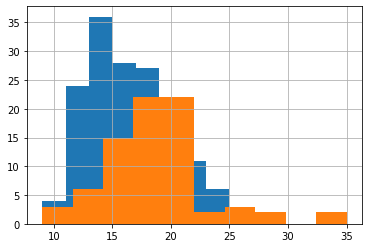

In [18]:
# Plot the distributions
df[df.trans.str.startswith('auto')].cty.hist()
df[df.trans.str.startswith('manual')].cty.hist()

In [19]:
# Null: H_0 = No, H_a = Yes
# alpha = .05
# Verify: Independent variables, normal distribution, equal variance...
df[df.trans.str.startswith('auto')].cty.var(), df[df.trans.str.startswith('manual')].cty.var()

(14.81308182263596, 20.14319890635681)

In [20]:
# Calculate t and p
t, p = stats.ttest_ind(df[df.trans.str.startswith('manual')].cty, df[df.trans.str.startswith('auto')].cty)
t, p

(4.781718413818975, 3.088973514167085e-06)

In [21]:
# Decide
t > 0 and p < .05

True

#### We reject the null hypothesis, manual cars get statistically-significant better gas mileage than automatic cars.

In [22]:
# Safe test
stats.mannwhitneyu(df[df.trans.str.startswith('manual')].cty, df[df.trans.str.startswith('auto')].cty)

MannwhitneyuResult(statistic=3814.5, pvalue=2.1320221166439075e-06)